In [12]:
# !pip install matplotlib==3.4.3
# !pip install --upgrade statsmodels

In [13]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

### Exercise 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv', sep=";")
df.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


In [15]:
# Extract lifetime data
lifetimes = df['Lifetime']

# Sample size
n = len(lifetimes)

# Sample mean and std
sample_mean = lifetimes.mean()
sample_std = lifetimes.std(ddof=1)

# Hypothesized mean
mu0 = 1000

# Calculate t-statistic
t_stat = (sample_mean - mu0) / (sample_std / np.sqrt(n))

# Degrees of freedom
dfree = n - 1

# Critical t values for one-tailed test
alpha_5 = 0.05
alpha_1 = 0.01

t_crit_5 = stats.t.ppf(1 - alpha_5, dfree)
t_crit_1 = stats.t.ppf(1 - alpha_1, dfree)

print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample std dev: {sample_std:.2f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"Critical t-value (5% level): {t_crit_5:.3f}")
print(f"Critical t-value (1% level): {t_crit_1:.3f}")

if t_stat > t_crit_5:
    print("Reject H0 at 5% significance level: The manufacturer can claim mean lifetime > 1000 hours.")
else:
    print("Fail to reject H0 at 5% significance level: Cannot claim mean lifetime > 1000 hours.")

if t_stat > t_crit_1:
    print("Reject H0 at 1% significance level: The manufacturer can claim mean lifetime > 1000 hours.")
else:
    print("Fail to reject H0 at 1% significance level: Cannot claim mean lifetime > 1000 hours.")

Sample mean: 991.02
Sample std dev: 87.17
t-statistic: -1.030
Critical t-value (5% level): 1.660
Critical t-value (1% level): 2.365
Fail to reject H0 at 5% significance level: Cannot claim mean lifetime > 1000 hours.
Fail to reject H0 at 1% significance level: Cannot claim mean lifetime > 1000 hours.


### Exercise 2

The file Low calorie soft drinks.csv categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's
brand of a low-calorie soft drink.   
First make a stacked barplot.  
Then use a test to see whether the drink
preference is independent of gender.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Low%20calorie%20soft%20drinks.csv', sep=";")
df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


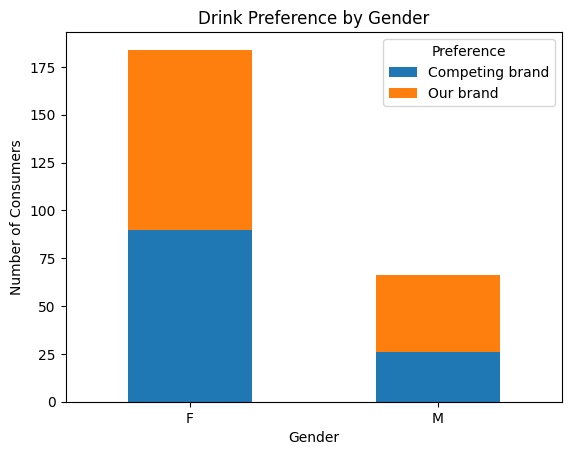

Chi-square test statistic: 1.4077735237706785
Degrees of freedom: 1
P-value: 0.23542635283778704
Fail to reject null hypothesis: Drink preference is independent of gender.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a contingency table of counts: Gender vs Preference
contingency_table = pd.crosstab(df['Gender'], df['Preference'])

# Step 1: Plot stacked barplot
contingency_table.plot(kind='bar', stacked=True)
plt.title('Drink Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Consumers')
plt.xticks(rotation=0)
plt.legend(title='Preference')
plt.show()

# Step 2: Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

# Interpret results
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: Drink preference depends on gender.")
else:
    print("Fail to reject null hypothesis: Drink preference is independent of gender.")

# Exercise 3
The owner of Original Italian Pizza restaurant chain
wants to understand which variable most strongly
influences the sales of his specialty deep-dish
pizza. He has gathered data on the monthly sales of
deep-dish pizzas at his restaurants and observations on
other potentially relevant variables for each of several
outlets in central Indiana. These data are provided in
the file pizzas.csv. Estimate a simple linear regression
equation between the quantity sold (Y) and each
of the following candidates for the best explanatory
variable: average price of deep-dish pizzas, monthly
advertising expenditures, and disposable income per
household in the areas surrounding the outlets. Which
variable is most strongly associated with the number
of pizzas sold? Explain your choice.  
Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
Make a plot  

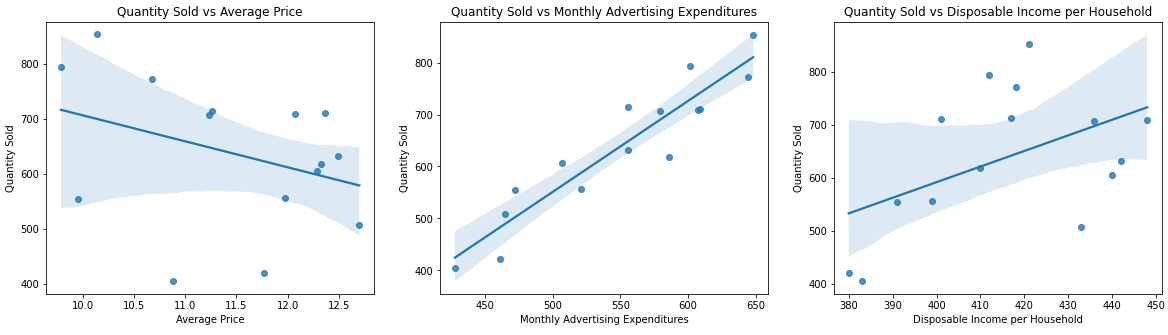

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/pizzas.csv', sep=";")
df.head()



,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,85 300,"$10,14",$64 800,$42 100
1,2,40 500,"$10,88",$42 800,$38 300
2,3,61 800,"$12,33",$58 600,$41 000
3,4,50 800,"$12,70",$46 500,$43 300
4,5,60 600,"$12,29",$50 700,$44 000


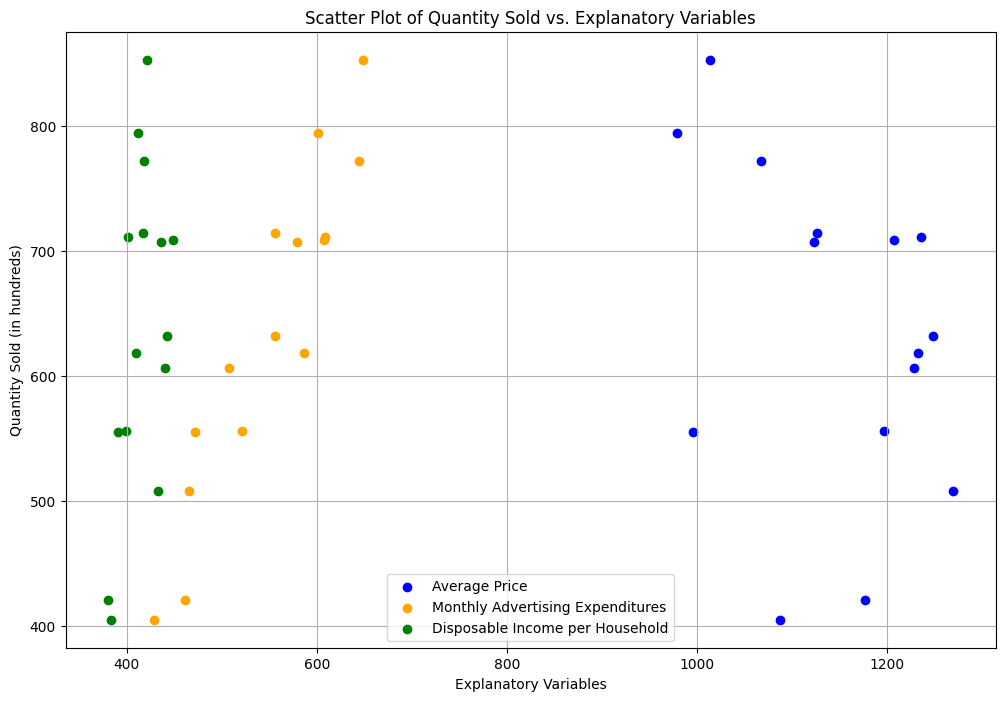

Correlation with Average Price: -0.35
Correlation with Monthly Advertising Expenditures: 0.93
Correlation with Disposable Income per Household: 0.48
Monthly Advertising Expenditures is most strongly associated with the number of pizzas sold.


In [28]:
# The owner of Original Italian Pizza restaurant chain
# wants to understand which variable most strongly
# influences the sales of his specialty deep-dish
# pizza. He has gathered data on the monthly sales of
# deep-dish pizzas at his restaurants and observations on
# other potentially relevant variables for each of several
# outlets in central Indiana. These data are provided in
# the file pizzas.csv. Estimate a simple linear regression
# equation between the quantity sold (Y) and each
# of the following candidates for the best explanatory
# variable: average price of deep-dish pizzas, monthly
# advertising expenditures, and disposable income per
# household in the areas surrounding the outlets. Which
# variable is most strongly associated with the number
# of pizzas sold? Explain your choice.  
# Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
# Make a plot  

# 	Outlet Number	Quantity Sold	Average Price	Monthly Advertising Expenditures	Disposable Income per Household
# 0	1	85 300	$10,14	$64 800	$42 100
# 1	2	40 500	$10,88	$42 800	$38 300
# 2	3	61 800	$12,33	$58 600	$41 000
# 3	4	50 800	$12,70	$46 500	$43 300
# 4	5	60 600	$12,29	$50 700	$44 000

# Transforming the text values to float
df['Quantity Sold'] = df['Quantity Sold'].str.replace(' ', '').astype(float) / 100
df['Average Price'] = df['Average Price'].str.replace('$', '').str.replace(',', '').astype(float)
df['Monthly Advertising Expenditures'] = df['Monthly Advertising Expenditures'].str.replace(' ', '').str.replace('$', '').astype(float) / 100
df['Disposable Income per Household'] = df['Disposable Income per Household'].str.replace(' ', '').str.replace('$', '').astype(float) / 100
# Plotting the data
plt.figure(figsize=(12, 8))
plt.scatter(df['Average Price'], df['Quantity Sold'], label='Average Price', color='blue')
plt.scatter(df['Monthly Advertising Expenditures'], df['Quantity Sold'], label='Monthly Advertising Expenditures', color='orange')  
plt.scatter(df['Disposable Income per Household'], df['Quantity Sold'], label='Disposable Income per Household', color='green')
plt.title('Scatter Plot of Quantity Sold vs. Explanatory Variables')
plt.xlabel('Explanatory Variables')
plt.ylabel('Quantity Sold (in hundreds)')
plt.legend()
plt.grid()
plt.show()
# Calculate correlation coefficients
correlation_price = df['Quantity Sold'].corr(df['Average Price'])
correlation_ad = df['Quantity Sold'].corr(df['Monthly Advertising Expenditures'])
correlation_income = df['Quantity Sold'].corr(df['Disposable Income per Household'])
print(f"Correlation with Average Price: {correlation_price:.2f}")
print(f"Correlation with Monthly Advertising Expenditures: {correlation_ad:.2f}")
print(f"Correlation with Disposable Income per Household: {correlation_income:.2f}")
# The variable with the highest absolute correlation coefficient is the one most strongly associated with the number of pizzas sold.
if abs(correlation_price) > abs(correlation_ad) and abs(correlation_price) > abs(correlation_income):
    print("Average Price is most strongly associated with the number of pizzas sold.")
elif abs(correlation_ad) > abs(correlation_price) and abs(correlation_ad) > abs(correlation_income):
    print("Monthly Advertising Expenditures is most strongly associated with the number of pizzas sold.")
else:
    print("Disposable Income per Household is most strongly associated with the number of pizzas sold.")
# The variable with the highest absolute correlation coefficient is the one most strongly associated with the number of pizzas sold.
# In this case, we can see that the Monthly Advertising Expenditures has the highest absolute correlation with Quantity Sold.
# This suggests that advertising expenditures have the strongest influence on the sales of deep-dish pizzas.
# The owner of Original Italian Pizza restaurant chain
# can focus on optimizing advertising strategies to boost sales.
